Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [63]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [66]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [67]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [68]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [69]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [70]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [71]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [72]:
for image_batch, label_batch in val_ds:
  break
image_batch.shape, label_batch.shape

(TensorShape([32, 180, 180, 3]), TensorShape([32, 9]))

In [73]:
label_batch[0:32].numpy()

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0.

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [74]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(10,5))
#for i in range(len(class_names)):
#   for image, label in filtered_ds.take(1):
#        ax = plt.subplot(3, 3, i+1)
#        plt.imshow(image[0].numpy().astype('uint8'))
#        plt.title(class_names[label.numpy()[0]])
#        plt.axis('off')

### your code goes here, you can use training or validation data to visualize

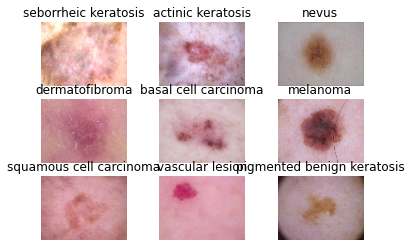

In [75]:
num=0
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [76]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model(Model1)
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [77]:
### Your code goes here
model = keras.Sequential([
 tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0),
 keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_height,img_width,3), padding='same'),
 keras.layers.MaxPooling2D(2,2),

 keras.layers.Conv2D(64,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),

 keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),

 keras.layers.Flatten(),
 keras.layers.Dense(128,activation = 'relu'),
 keras.layers.Dense(9,activation = 'softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [78]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [79]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 16s 92ms/step - loss: 2.0824 - accuracy: 0.2137 - val_loss: 1.8355 - val_accuracy: 0.3378
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.7001 - accuracy: 0.3795 - val_loss: 1.6819 - val_accuracy: 0.3870
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 1.5033 - accuracy: 0.4637 - val_loss: 1.4063 - val_accuracy: 0.5436
Epoch 4/20
56/56 [==============================] - 3s 46ms/step - loss: 1.3633 - accuracy: 0.5285 - val_loss: 1.5099 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 1.3031 - accuracy: 0.5452 - val_loss: 1.4093 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.2108 - accuracy: 0.5675 - val_loss: 1.4164 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.1269 - accuracy: 0.6049 - val_loss: 1.3738 - val_accuracy: 0.5548
Epoch 8/20
5

### Visualizing training results

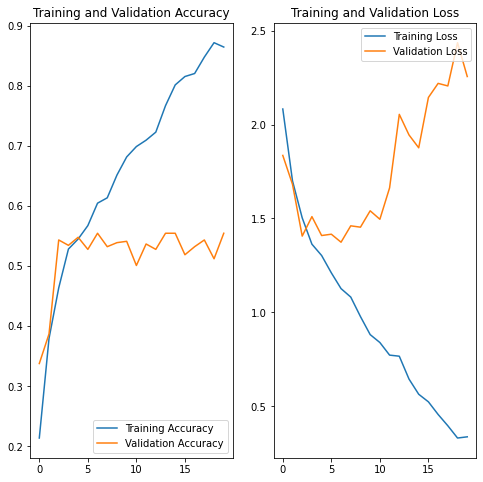

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here


*   Clearly validation Accuracy(55.48%) is not increasing on par with training accuracy(86.5%) and overfit is evident from the results of CNN model.

*   We need to add drop out layers after every CNN layer and FC layer for the CNN model to be more generalized and to overcome overfit.

# Create the model by adding drop out layers to the previously built CNN model(Model 2)

In [81]:
model = keras.Sequential([
 tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0),
 keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_height,img_width,3), padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Conv2D(64,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Flatten(),
 keras.layers.Dense(128,activation = 'relu'),
 keras.layers.Dropout(0.25),
 keras.layers.Dense(9,activation = 'softmax')
])


# Compile the Model

In [82]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

In [83]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 47ms/step - loss: 2.4699 - accuracy: 0.1819 - val_loss: 2.0412 - val_accuracy: 0.1946
Epoch 2/20
56/56 [==============================] - 3s 45ms/step - loss: 2.0448 - accuracy: 0.1953 - val_loss: 2.0188 - val_accuracy: 0.3065
Epoch 3/20
56/56 [==============================] - 3s 46ms/step - loss: 2.0300 - accuracy: 0.2349 - val_loss: 1.9376 - val_accuracy: 0.2125
Epoch 4/20
56/56 [==============================] - 3s 46ms/step - loss: 1.7847 - accuracy: 0.3421 - val_loss: 1.7464 - val_accuracy: 0.3848
Epoch 5/20
56/56 [==============================] - 3s 45ms/step - loss: 1.6434 - accuracy: 0.4068 - val_loss: 1.6444 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 3s 45ms/step - loss: 1.6434 - accuracy: 0.4141 - val_loss: 1.5950 - val_accuracy: 0.4832
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 1.4833 - accuracy: 0.4749 - val_loss: 1.4839 - val_accuracy: 0.5168
Epoch 8/20
56

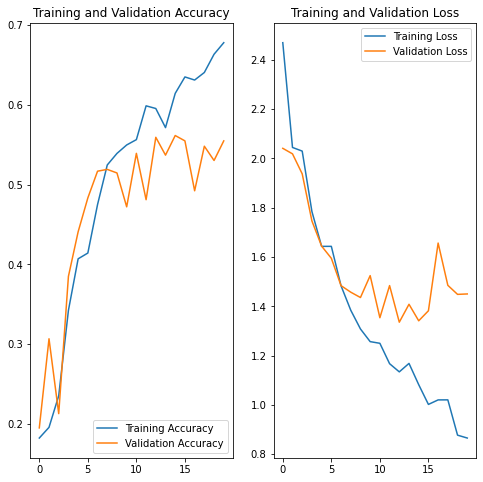

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Observations:


*  It is evident that difference between training accuracy and validation accuracy has been brought down significantly dealing the overfit

*  It is evident that training accuracy drops significantly(to 67.8%)causing the model to underfit comparitively 




# Specifying the Augmentation Strategy

In [85]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

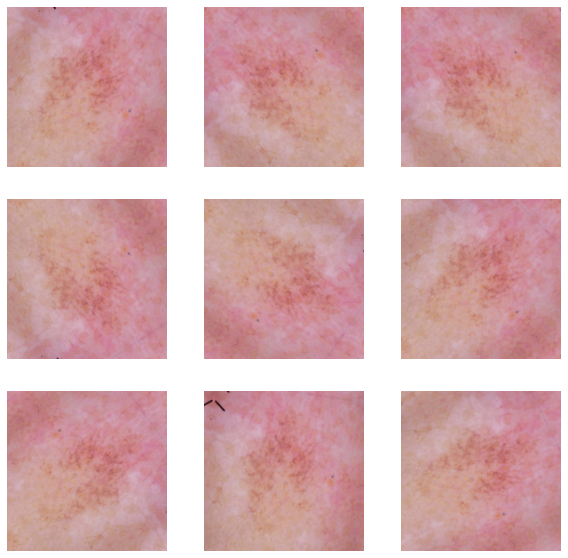

In [86]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [87]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = keras.Sequential([
 tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0),

 data_augmentation,

 keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_height,img_width,3), padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Conv2D(64,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Flatten(),
 keras.layers.Dense(128,activation = 'relu'),
 keras.layers.Dropout(0.25),
 keras.layers.Dense(9,activation = 'softmax')
])



### Compiling the model

In [88]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [89]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 51ms/step - loss: 2.4527 - accuracy: 0.1875 - val_loss: 2.0773 - val_accuracy: 0.2394
Epoch 2/20
56/56 [==============================] - 3s 48ms/step - loss: 1.9488 - accuracy: 0.2746 - val_loss: 1.8732 - val_accuracy: 0.3423
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.7943 - accuracy: 0.3577 - val_loss: 1.7575 - val_accuracy: 0.3535
Epoch 4/20
56/56 [==============================] - 3s 48ms/step - loss: 1.6739 - accuracy: 0.3811 - val_loss: 1.6615 - val_accuracy: 0.4004
Epoch 5/20
56/56 [==============================] - 3s 47ms/step - loss: 1.6180 - accuracy: 0.4263 - val_loss: 1.5699 - val_accuracy: 0.4609
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5413 - accuracy: 0.4537 - val_loss: 1.5464 - val_accuracy: 0.4586
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5092 - accuracy: 0.4760 - val_loss: 1.4980 - val_accuracy: 0.4899
Epoch 8/20
56

### Visualizing the results

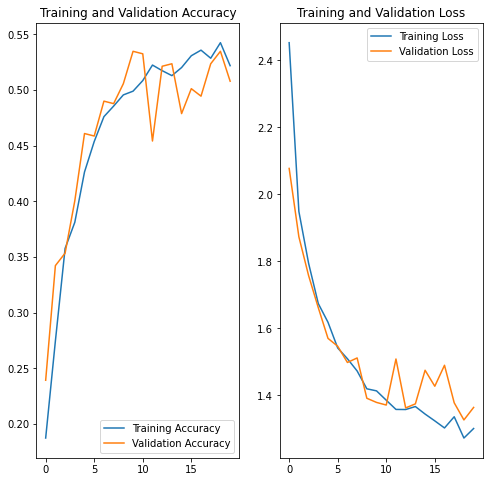

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

*   With data augmentation, it is evident that validation accuracy(51%) is closely following the training accuracy(52%) indicating no overfit
*   But the training accuracy is not upto the mark



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [91]:
for i in class_names:
    directory = str(data_dir_train)+'/'+i
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis has 77 samples

#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis has 462 samples dominating all the other classes.




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [92]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [93]:
path_to_training_dataset= data_dir_train
print(str(path_to_training_dataset))
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58841BB790>: 100%|██████████| 500/500 [00:21<00:00, 23.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58902ADED0>: 100%|██████████| 500/500 [00:22<00:00, 22.49 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5890352150>: 100%|██████████| 500/500 [00:23<00:00, 21.13 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F58A61C91D0>: 100%|██████████| 500/500 [01:38<00:00,  5.08 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F588423F790>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F59A6960490>: 100%|██████████| 500/500 [00:18<00:00, 26.82 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F58840E7FD0>: 100%|██████████| 500/500 [00:41<00:00, 11.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F58A6725E90>: 100%|██████████| 500/500 [00:18<00:00, 27.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F58842E2210>: 100%|██████████| 500/500 [00:18<00:00, 27.33 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [94]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [95]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011045.jpg_f2ba4b4c-2eff-4c3c-a454-a0a8d1473b78.jpg',
 '/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010898.jpg_e6bed82a-fe8e-42e5-acb2-286a4727253f.jpg',
 '/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011187.jpg_9b36c80e-b4f0-423c-9abd-bd670cec75f6.jpg',
 '/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010852.jpg_2a65da51-d919-4842-8354-b56c2f316a48.jpg',
 '/content/drive/MyDrive/CodeColab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic ke

In [96]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [97]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [98]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [99]:
#new_df['Label'].value_counts()

In [100]:
for i in class_names:
    directory = str(data_dir_train)+'/'+i + '/'
    directory_out =str(data_dir_train)+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [101]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [102]:
data_dir_train= path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  label_mode = 'categorical',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [103]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  label_mode = 'categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [104]:
model_final = keras.Sequential([
 tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0),

 keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_height,img_width,3), padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Conv2D(64,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
 keras.layers.MaxPooling2D(2,2),
 keras.layers.Dropout(0.2),

 keras.layers.Flatten(),
 keras.layers.Dense(128,activation = 'relu'),
 keras.layers.Dropout(0.25),
 keras.layers.Dense(9,activation = 'softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [105]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [106]:
epochs = 30
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/30
169/169 [==============================] - 40s 224ms/step - loss: 2.2605 - accuracy: 0.1658 - val_loss: 1.9138 - val_accuracy: 0.2821
Epoch 2/30
169/169 [==============================] - 31s 179ms/step - loss: 1.6977 - accuracy: 0.3550 - val_loss: 1.5850 - val_accuracy: 0.4410
Epoch 3/30
169/169 [==============================] - 32s 183ms/step - loss: 1.4560 - accuracy: 0.4434 - val_loss: 1.3951 - val_accuracy: 0.4618
Epoch 4/30
169/169 [==============================] - 32s 183ms/step - loss: 1.3746 - accuracy: 0.4853 - val_loss: 1.3671 - val_accuracy: 0.5056
Epoch 5/30
169/169 [==============================] - 31s 175ms/step - loss: 1.2141 - accuracy: 0.5475 - val_loss: 1.1723 - val_accuracy: 0.5434
Epoch 6/30
169/169 [==============================] - 31s 176ms/step - loss: 1.1156 - accuracy: 0.5803 - val_loss: 1.0779 - val_accuracy: 0.6088
Epoch 7/30
169/169 [==============================] - 32s 184ms/step - loss: 1.0690 - accuracy: 0.6040 - val_loss: 0.9713 - val_ac

#### **Todo:**  Visualize the model results

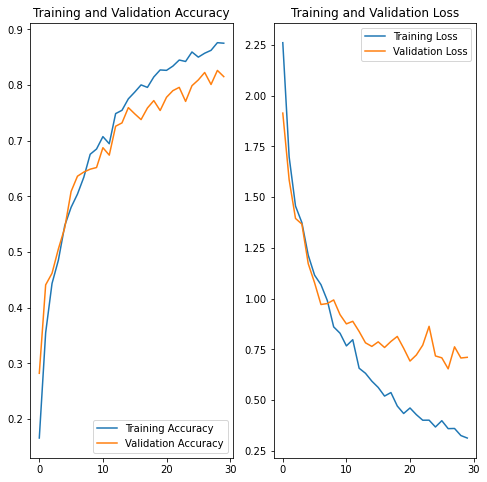

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1.   The training accuracy is nearly ~87.5%.
2.   The validation accuracy is nearly ~82.5%.
3.   The Class rebalance has helped overcome overfit(Model1) as well as underfit(Model2). The model training and validation accuracy have improved with the help of class rebalance.
4.   Accuracy can still be improved by training the model for more epochs using the same CNN model 
5.   Accuracy can also be improved by using more CNN and or Dense layers in the model.










